In [1]:
import requests
import sys
import webbrowser
#b
import bs4
from scrapy import Selector

### <font color=red>A</font>: A Google search for the term "Tim Berners-Lee".

> {0}will be replace by string what we want to search

> source is a parameter which can ne give lnms(news) app(application) web(webpage)

> another parameter using together is tbs=nws(news)

The status_code is 200
****************************************************************************************************
Header print in here:
 {'Content-Type': 'text/html; charset=ISO-8859-1', 'Date': 'Thu, 06 Feb 2020 16:59:08 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2020-02-06-16; expires=Sat, 07-Mar-2020 16:59:08 GMT; path=/; domain=.google.com; Secure, CGIC=IgMqLyo; expires=Tue, 04-Aug-2020 16:59:08 GMT; path=/complete/search; domain=.google.com; HttpOnly, CGIC=IgMqLyo; expires=Tue, 04-Aug-2020 16:59:08 GMT; path=/search; domain=.google.com; HttpOnly, NID=197=XquUUZ__ts83o6_WimhJHj_b8ifarn8tm9UpDlzb_u5MDqhl4f7RbpRdyU7ZzwmUDBe9J81Rr7vO7_9M5MHskB9xNocrMxG6dekD1WNsVXY-U5vfe8ttykK3C2CIviUnCG63Lf0XPsSHLnpbBHAMHWvFkcnpvFelilfGCEsQygA; expires=Fri, 07-Aug-2020 16:59:08 
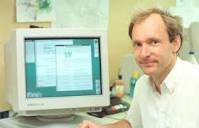
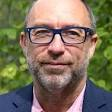
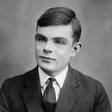

In [2]:
#we built a class to specifty function about Search
class Search:
    def __init__(self,term):
        self.term=term
        #self.subjectivity=0

        self.url='https://www.google.com/search?q={0}&source=web'.format(self.term)
    
    def run(self):
        #we store reponse in response
        response = requests.get(self.url)
        #if code<400, this request is success
        print('The status_code is',response.status_code)
        print('*'*100)
        print('Header print in here:\n',response.headers)
        print('*'*100)
        #webbrowser is used to open response url direct from broswer
        webbrowser.open(response.url)
        #we use BS4 to parser html content
        soup_1 = bs4.BeautifulSoup(response.content,'html.parser')
        body_content=soup_1.find_all('body')
        for i in body_content:
            print(i)
        print('*'*100)
        """
        #print(response.content)
        sel_3=Selector(text=response.content)
        sel_3.xpath("//head")
        sel_3.css('body')
        """

        
a = Search('Tim Berners-Lee')
a.run()



<br>

<br>

<br>

### <font color=red>B</font>: A POST request to a website that does not accept POST requests.

In [7]:
#this website is used for html beginers, so i choose a sepcific page which only for 'get' request
bad_r = requests.post('https://httpbin.org/get')
# 405 error means Method not allowed, it means we try to visit a websie not allow POST request
print('The status_code is',bad_r.status_code)
print('*'*100)
print('Header print in here:\n',bad_r.headers)
print('*'*100)
#print(bad_r.text)
"""
sel=Selector(text=bad_r.content)
sel.xpath("//body").extract()
"""


soup_3 = bs4.BeautifulSoup(bad_r.content,'html.parser')
body_content=soup_3.find_all('body')
for i in body_content:
    print(i)
    
print(bad_r.content)


The status_code is 405
****************************************************************************************************
Header print in here:
 {'Date': 'Thu, 06 Feb 2020 17:01:39 GMT', 'Content-Type': 'text/html', 'Content-Length': '178', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Allow': 'OPTIONS, GET, HEAD', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}
****************************************************************************************************
b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>405 Method Not Allowed</title>\n<h1>Method Not Allowed</h1>\n<p>The method is not allowed for the requested URL.</p>\n'


<br>

<br>

<br>

### <font color=red>C</font>: A request to a URL that does not exist.

In [18]:
empty_r = requests.post('https://aaaaaaaaaa')
print('The status_code is',empty_r.status_code)
print('*'*100)
print('Header print in here:\n',empty_r.headers)
print('*'*100)
selctor=Selector(text=empty_r.content)
selctor.xpath('//body').extract()

soup_4=bs4.BeautifulSoup(bad_r.content,'html.parser')
badcontent=soup_4.find_all('body')
for i in badcontent:
    print(i)


ConnectionError: HTTPSConnectionPool(host='aaaaaaaaaa', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001F69CFE6B70>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))